In [1]:
import numpy as np
import matplotlib.pyplot as plt

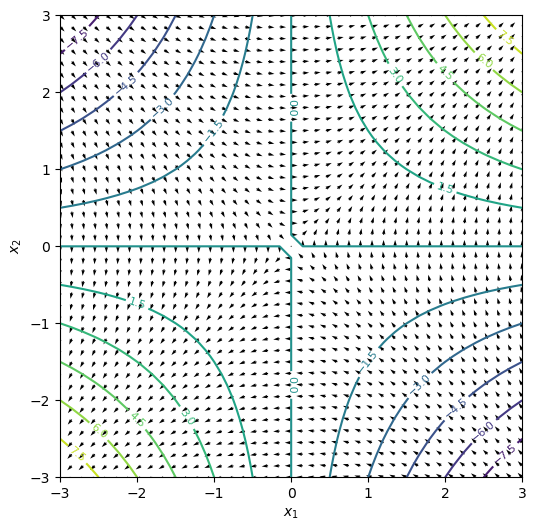

In [4]:
x1 = np.linspace(-3, 3, 41)
x2 = np.linspace(-3, 3, 41)
X1, X2 = np.meshgrid(x1, x2)

F = X1 * X2
U = X2             # df/dx1
V = X1             # df/dx2

plt.figure(figsize=(7, 6))
cs = plt.contour(X1, X2, F, levels=15)
plt.clabel(cs, inline=True, fontsize=8)

mag = np.hypot(U, V)
mag[mag == 0] = 1.0
U_n = U / mag
V_n = V / mag

plt.quiver(X1, X2, U_n, V_n, angles="xy", scale_units="xy", scale=12, width=0.0025)

plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.gca().set_aspect("equal", adjustable="box")
plt.show()

In [ ]:
import sympy as sp

# Choose sizes m x n (example: m=3, n=2)
m, n = 3, 2

A_symbols = sp.symbols('a11 a12 a21 a22 a31 a32')
A = sp.Matrix(m, n, A_symbols)

x_symbols = sp.symbols('x1:%d' % (n+1))
x = sp.Matrix(x_symbols)

b_symbols = sp.symbols('b1:%d' % (m+1))
b = sp.Matrix(b_symbols)

f = A * x + b
J = f.jacobian(x)

A, x, b, f, J

(Matrix([
 [a11, a12],
 [a21, a22],
 [a31, a32]]),
 Matrix([
 [x1],
 [x2]]),
 Matrix([
 [b1],
 [b2],
 [b3]]),
 Matrix([
 [a11*x1 + a12*x2 + b1],
 [a21*x1 + a22*x2 + b2],
 [a31*x1 + a32*x2 + b3]]),
 Matrix([
 [a11, a12],
 [a21, a22],
 [a31, a32]]))

In [7]:
# Verify the inequalities ‖x‖_∞ ≤ ‖x‖_2 ≤ √n‖x‖_∞ numerically for random vectors
# and show that the upper-bound is tight with x = (1,1,...,1).
import numpy as np
import pandas as pd
from math import sqrt

def norms(x):
    x = np.asarray(x, dtype=float)
    linf = np.max(np.abs(x))
    l2 = np.linalg.norm(x, 2)
    return linf, l2

def check_inequalities(n, trials=10000, seed=0):
    rng = np.random.default_rng(seed)
    # Random vectors, including some sparse
    X = rng.normal(size=(trials, n))
    # add some with many zeros to explore lower ratios
    mask = rng.random((trials, n)) < 0.7
    X_sparse = X * mask
    X_all = np.vstack([X, X_sparse, np.ones((1, n)), -np.ones((1, n))])
    linf = np.max(np.abs(X_all), axis=1)
    l2 = np.linalg.norm(X_all, axis=1)
    
    # avoid division by zero
    nonzero = linf > 0
    ratios = np.zeros_like(linf)
    ratios[nonzero] = l2[nonzero] / linf[nonzero]
    
    min_gap = np.min(l2 - linf)  # should be ≥ 0
    max_ratio = np.max(ratios)   # should be ≤ √n, and achieves √n with ones vector
    
    # Identify the vector that achieves the max ratio
    idx = np.argmax(ratios)
    vec_at_max = X_all[idx]
    
    return {
        "n": n,
        "min(‖x‖₂ - ‖x‖∞)": float(min_gap),
        "max(‖x‖₂/‖x‖∞)": float(max_ratio),
        "√n": sqrt(n),
        "near_max_example_first5": vec_at_max[:min(5, n)].tolist()
    }

ns = [2, 3, 5, 10, 50]
rows = [check_inequalities(n) for n in ns]
df = pd.DataFrame(rows, columns=["n","min(‖x‖₂ - ‖x‖∞)","max(‖x‖₂/‖x‖∞)","√n","near_max_example_first5"])
df

,n,min(‖x‖₂ - ‖x‖∞),max(‖x‖₂/‖x‖∞),√n,near_max_example_first5
0,2,0.000000,1.414214,1.414214,"[1.0, 1.0]"
1,3,0.000000,1.732051,1.732051,"[1.0, 1.0, 1.0]"
2,5,0.000000,2.236068,2.236068,"[1.0, 1.0, 1.0, 1.0, 1.0]"
3,10,0.000000,3.162278,3.162278,"[1.0, 1.0, 1.0, 1.0, 1.0]"
4,50,1.502917,7.071068,7.071068,"[1.0, 1.0, 1.0, 1.0, 1.0]"
